In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,f1_score

In [3]:
df = pd.read_csv("C:/Users/Abdilfatah/Desktop/Data/MachineLearningRating_v3.txt", sep="|")

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_13812\3184960549.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Abdilfatah/Desktop/Data/MachineLearningRating_v3.txt", sep="|")


In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [6]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [25]:
#The first 12 rows
df = df.iloc[1:12]


In [26]:
df

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0
7,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,35.332316,0.0
8,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
9,145245,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0
10,145245,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


In [27]:
def encoder(method, dataframe, columns_label, columns_onehot):
    
    if method == 'labelEncoder':      
    
        df_lbl = dataframe.copy()
    
        for col in columns_label:
            label = LabelEncoder()
            label.fit(list(dataframe[col].values))
            df_lbl[col] = label.transform(df_lbl[col].values)
        
        return df_lbl
    
    elif method == 'oneHotEncoder':
        
        df_oh = dataframe.copy()

        df_oh= pd.get_dummies(data = df_oh, prefix = 'ohe', prefix_sep='_',
                       columns = columns_onehot,
                       drop_first =True,
                       dtype='int8')
        
        return df_oh

In [43]:
method =['labelEncoder', 'oneHotEncoder']
dataframe = df.copy()
columns_label = ['TotalClaims', 'TotalPremium', 'mmcode']
columns_onehot = ['TotalClaims', 'TotalPremium', 'mmcode', 'kilowatts']

df_label = encoder(method[0], dataframe, columns_label, columns_onehot)

df_onehot = encoder(method[1], dataframe, columns_label, columns_onehot)

df_label.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3,0
2,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0
3,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,6,0
4,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0
5,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,2,0


In [44]:
df['TotalClaims'].unique().tolist()

[0.0]

In [45]:
df_onehot.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,Section,Product,StatutoryClass,StatutoryRiskType,ohe_1.00947368421,ohe_3.256434634974,ohe_21.929824561403,ohe_35.332315789474,ohe_50.474736842105,ohe_512.848070175439
1,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0,1,0,0,0
2,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0,0,0,0,0
3,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0,0,0,0,1
4,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0,0,0,0,0
5,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,1,0,0,0,0


In [46]:
def scaler(method, df, columns_scaler):    
    if method == 'standartScaler':        
        Standard = StandardScaler()
        df_standard = df.copy()
        df_standard[columns_scaler]=Standard.fit_transform(df_standard[columns_scaler])        
        return df_standard
        
    elif method == 'minMaxScaler':        
        MinMax= MinMaxScaler()
        df_minmax = df.copy()
        df_minmax[columns_scaler]=MinMax.fit_transform(df_minmax[columns_scaler])        
        return df_minmax
    
    elif method =='npLog':        
        df_nplog = df.copy()
        df_nplog[columns_scaler]=np.log(df_nplog[columns_scaler])        
        return df_nplog
    
    elif method == 'default':
        
        return df

In [47]:
method = 'minMaxScaler'
data = df_label
columns_scaler = ['TotalClaims']
df_scaler = scaler(method, data, columns_scaler)

In [48]:
df_scaler.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3,0.0
2,145249,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0.0
3,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,6,0.0
4,145255,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0,0.0
5,145247,12827,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,2,0.0


In [63]:
X = df_scaler.drop('TotalClaims',axis=1)
y = df_scaler['TotalClaims']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [64]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [67]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr_model = LinearRegression().fit(X_train, y_train)
#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LinearRegression()

In [69]:
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
%%time
# Random Forest
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)


CPU times: total: 203 ms
Wall time: 386 ms


RandomForestRegressor(random_state=42)

In [71]:
%%time
# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: total: 1.19 s
Wall time: 342 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [72]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print("Evaluation metrics for :{}".format(model.__class__.__name__))
    print(f"\t Mean Absolute Error: {mae}")
    print(f"\t Mean Squared Error: {mse}")
    print(f"\t R-squared Score: {r2}")
    return mae,mse,r2,y_pred



Evaluation metrics for :LinearRegression
	 Mean Absolute Error: 0.0
	 Mean Squared Error: 0.0
	 R-squared Score: 1.0
Evaluation metrics for :DecisionTreeRegressor
	 Mean Absolute Error: 0.0
	 Mean Squared Error: 0.0
	 R-squared Score: 1.0
Evaluation metrics for :RandomForestRegressor
	 Mean Absolute Error: 0.0
	 Mean Squared Error: 0.0
	 R-squared Score: 1.0
Evaluation metrics for :XGBRegressor
	 Mean Absolute Error: 0.0
	 Mean Squared Error: 0.0
	 R-squared Score: 1.0


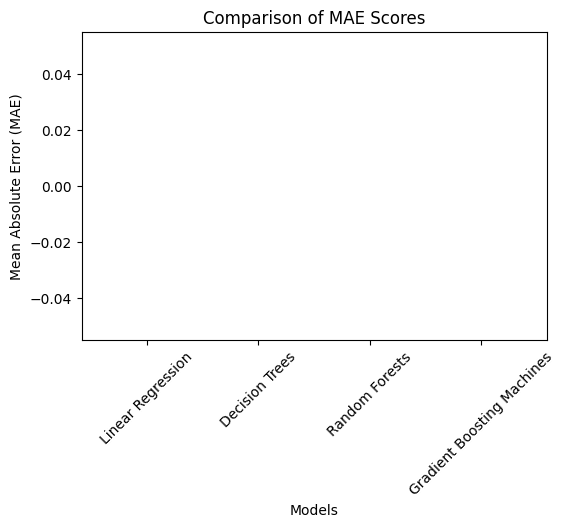

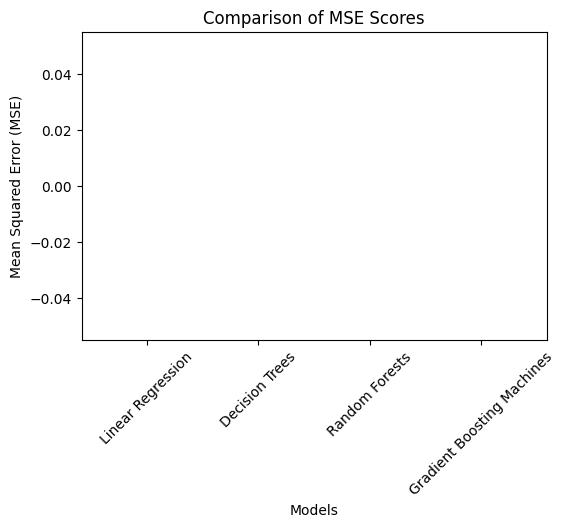

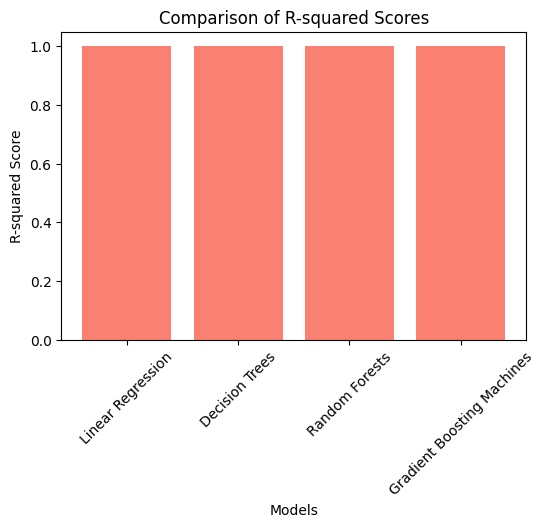

In [73]:
# Initialize lists to store evaluation metrics for each model
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting Machines']
mae_scores = []
mse_scores = []
r2_scores = []
y_predic = []

# Evaluate each model
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2,yp = evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    y_predic.append(yp)

# Plot MAE scores
plt.figure(figsize=(6, 4))
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot MSE scores
plt.figure(figsize=(6, 4))
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared scores
plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='salmon')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.show()

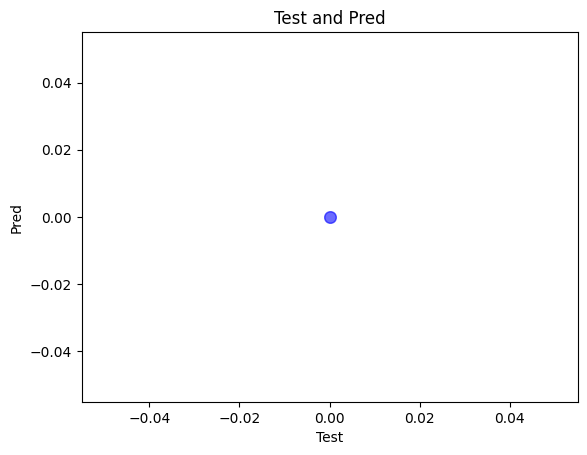

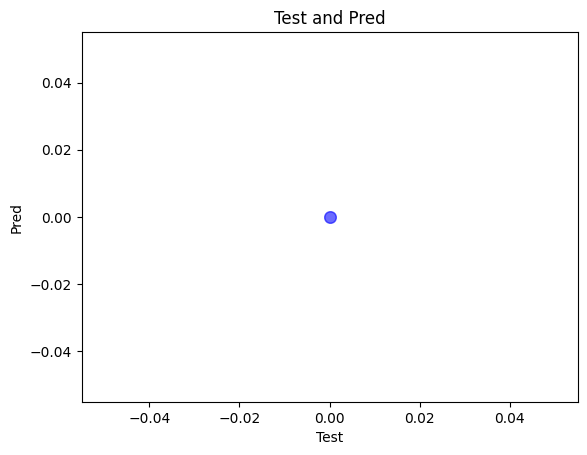

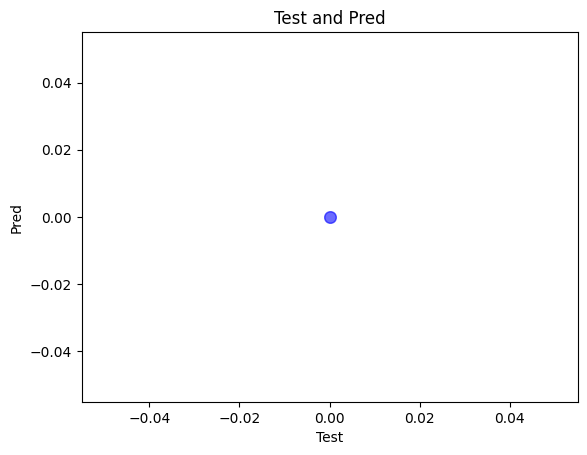

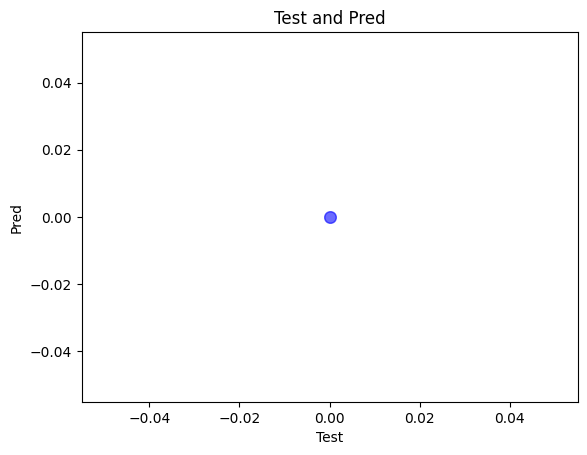

In [74]:
for y_p in y_predic:
    plt.scatter(x = y_test, y = yp, color = 'blue', marker = 'o', s = 70, alpha = 0.25,
            label = 'Test data')
    plt.title('Test and Pred')
    plt.xlabel('Test')
    plt.ylabel('Pred')
    plt.show()